##  A Complete Data Science Mini Project

#### Part 1: Data Preparation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder , OneHotEncoder , MinMaxScaler
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.pipeline import Pipeline

c:\Program Files\Python312\Lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


1. Load the dataset using pandas.

In [2]:
data = pd.read_csv('train.csv')

In [81]:
df = pd.DataFrame(data)

In [82]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#  Number of rows and columns
df.shape

(891, 12)

In [ ]:
# Get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### 📊 Titanic Dataset Overview

- **Total Rows:** 891  
- **Total Columns:** 12  
- **Memory Usage:** ~83.7 KB  

---

##### 🔢 Column Summary

| Column        | Type     | Non-Null Count | Missing Values | Description                        |
|---------------|----------|----------------|----------------|------------------------------------|
| PassengerId   | int64    | 891            | 0              | Unique ID for each passenger       |
| Survived      | int64    | 891            | 0              | Survival (0 = No, 1 = Yes)         |
| Pclass        | int64    | 891            | 0              | Passenger class (1 = 1st, 2, 3)    |
| Name          | object   | 891            | 0              | Full name                          |
| Sex           | object   | 891            | 0              | Gender                             |
| Age           | float64  | 714            | 177            | Age in years                       |
| SibSp         | int64    | 891            | 0              | Siblings/spouses aboard            |
| Parch         | int64    | 891            | 0              | Parents/children aboard            |
| Ticket        | object   | 891            | 0              | Ticket number                      |
| Fare          | float64  | 891            | 0              | Passenger fare                     |
| Cabin         | object   | 204            | 687            | Cabin number                       |
| Embarked      | object   | 889            | 2              | Port of embarkation                |


2. Inspect data types and identify categorical vs numerical features.

In [83]:
df = df.convert_dtypes()

In [62]:
df.dtypes

PassengerId             Int64
Survived                Int64
Pclass                  Int64
Name           string[python]
Sex            string[python]
Age                   Float64
SibSp                   Int64
Parch                   Int64
Ticket         string[python]
Fare                  Float64
Embarked       string[python]
AgeGroup       string[python]
dtype: object

In [64]:
# 3. Handle missing values appropriately:

In [12]:
# To check the number of missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# To check the number of missing values
((df.isnull().sum() / df.shape[0]) * 100).round()

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            20.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64

##### ⚠️ Missing Values Summary
- `Age`: 177 missing values (~19.9%)
- `Cabin`: 687 missing values (~77.1%) — heavily missing, may require special handling
- `Embarked`: 2 missing values (~0.2%)

In [ ]:
# Missing in this is 77 % must drop this col
df["Cabin"].sample(5)

87      NaN
463     NaN
52      D33
599     A20
298    C106
Name: Cabin, dtype: object

In [84]:
df = df.drop(columns="Cabin" ,axis= 1)

In [20]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.05,S


In [ ]:
# Missing in this is 20 %
df["Age"].sample(5)

766     NaN
542    11.0
269    35.0
62     45.0
561    40.0
Name: Age, dtype: float64

In [85]:
# the is exist outliers
df["Age"].fillna(df["Age"].median() , inplace = True)

In [29]:
df.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
688,689,0,3,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,S
652,653,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,S


In [86]:
print(df["Embarked"].mode()[0])

S


In [87]:
# Replacing the missing values in "Embarked" column with the mode value
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [88]:
# No missing Value 
df.isnull().sum().sum()

0

3. Display summary statistics (mean, std, min, max, count) using describe().

In [63]:
# Get information about the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,891.0,891.0,891.0,891.0
mean,446.0,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.0,0.0,1.0,0.42,0.0,0.0,0.0
25%,223.5,0.0,2.0,22.0,0.0,0.0,7.9104
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.4542
75%,668.5,1.0,3.0,35.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.3292


In [74]:
# Get information about the data
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,<NA>,<NA>,<NA>,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,<NA>,<NA>,<NA>,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,<NA>,<NA>,<NA>,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,891.0,<NA>,<NA>,<NA>,29.361582,13.019697,0.42,22.0,28.0,35.0,80.0
SibSp,891.0,<NA>,<NA>,<NA>,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,<NA>,<NA>,<NA>,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,<NA>,<NA>,<NA>,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


##### 🧠 General Insights

- The dataset contains **891 passengers**.
- About **38.4% of passengers survived**, while **61.6% did not**.

---

##### 🎫 Passenger Class (Pclass)
- Mean Pclass is **2.31**, indicating that more passengers were in **lower classes** (closer to 3rd class).
- The majority of passengers belonged to **3rd class (median = 3)**.

---

##### 👶 Age
- Mean age: **29.36 years**
- Youngest passenger: **0.42 years**, Oldest: **80 years**
- **25%** were younger than **22**, and **75%** were younger than **35**.
- Indicates a relatively **young population**, with possible implications for survival trends by age.

---

##### 👨‍👩‍👧‍👦 Family Aboard (SibSp & Parch)

- **SibSp (Siblings/Spouses Aboard):**
  - Most passengers had **no siblings/spouse** on board (median = 0).
  - Some had up to **8**, but these are rare outliers.

- **Parch (Parents/Children Aboard):**
  - Mean = **0.38**, median = **0**
  - Max = **6**, but **75%** had **0** → Most passengers traveled **alone** or with a spouse.

---

##### 💰 Fare
- Wide range from **0 to 512** (currency likely in British Pounds).
- Mean fare: **£32.20**, but **75% paid £31 or less**, and **50% paid less than £14.45**.
- High **standard deviation** (≈ 49.7) suggests some **wealthy outliers** (e.g., 1st class luxury cabins).

---

##### 🔍 Observations
- Data is **highly skewed** in Fare and Family features.
- Many passengers were **traveling alone**.
- Majority of passengers came from **lower classes**, which may influence survival outcomes.
- The wide range in fare and age provides opportunities for further **segmentation or modeling** (e.g., survival by age and class).

---

In [57]:
# There exist problems in Age column
df[(df["Age"] < 1) | (df["Age"] > 80)][["Age"]]

,Age
78,0.83
305,0.92
469,0.75
644,0.75
755,0.67
803,0.42
831,0.83


In [89]:
def age_group(age):
    if age < 1:
        return "Infant"
    elif age < 12:
        return "Child"
    elif age < 18:
        return "Teen"
    elif age < 60:
        return "Adult"
    else:
        return "Senior"

In [90]:
df["AgeGroup"] = df["Age"].apply(age_group)

In [60]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
243,244,0,3,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0,0,STON/O 2. 3101275,7.1250,S,Adult
358,359,1,3,"McGovern, Miss. Mary",female,28.0,0,0,330931,7.8792,Q,Adult
87,88,0,3,"Slocovski, Mr. Selman Francis",male,28.0,0,0,SOTON/OQ 392086,8.0500,S,Adult
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,C,Adult
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C,Adult


### Part 2: Data Transformation

1. Convert categorical columns (Sex, Embarked) using Label Encoding or One-Hot Encoding.

In [76]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'AgeGroup'],
      dtype='object')

In [91]:
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

In [92]:
df["Sex_Label"] = le_sex.fit_transform(df["Sex"])
df["Embarked_Label"] = le_embarked.fit_transform(df["Embarked"])

In [93]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,Sex_Label,Embarked_Label
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5,S,Teen,0,2
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,28.0,0,0,330932,7.7875,Q,Adult,0,1
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,S,Senior,1,2
408,409,0,3,"Birkeland, Mr. Hans Martin Monsen",male,21.0,0,0,312992,7.775,S,Adult,1,2
48,49,0,3,"Samaan, Mr. Youssef",male,28.0,2,0,2662,21.6792,C,Adult,1,0


In [94]:
print(dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_))))
print(dict(zip(le_embarked.classes_, le_embarked.transform(le_embarked.classes_))))

{'female': 0, 'male': 1}
{'C': 0, 'Q': 1, 'S': 2}


2. Normalize or standardize Fare and Age using any scaler (MinMax, StandardScaler, etc.).

In [95]:
scaler = StandardScaler()

In [ ]:
df[["Age_scaled", "Fare_scaled"]] = scaler.fit_transform(df[["Age", "Fare"]])

In [97]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,Sex_Label,Embarked_Label,Age_scaled,Fare_scaled
421,422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,Q,Adult,1,1,-0.642586,-0.492714
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5,S,Adult,1,2,0.125912,-0.437007
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.125,Q,Child,1,1,-1.718484,-0.061999
143,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.75,Q,Adult,1,1,-0.796286,-0.512513
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5,S,Adult,1,2,-0.104637,0.066360


3. Create new column: e.g., FamilySize = SibSp + Parch.

In [100]:
df["FamilySize"] = df["SibSp"] + df["Parch"]

### Part 3: Exploratory Data Analysis (EDA)

1. Survival Rate by Gender

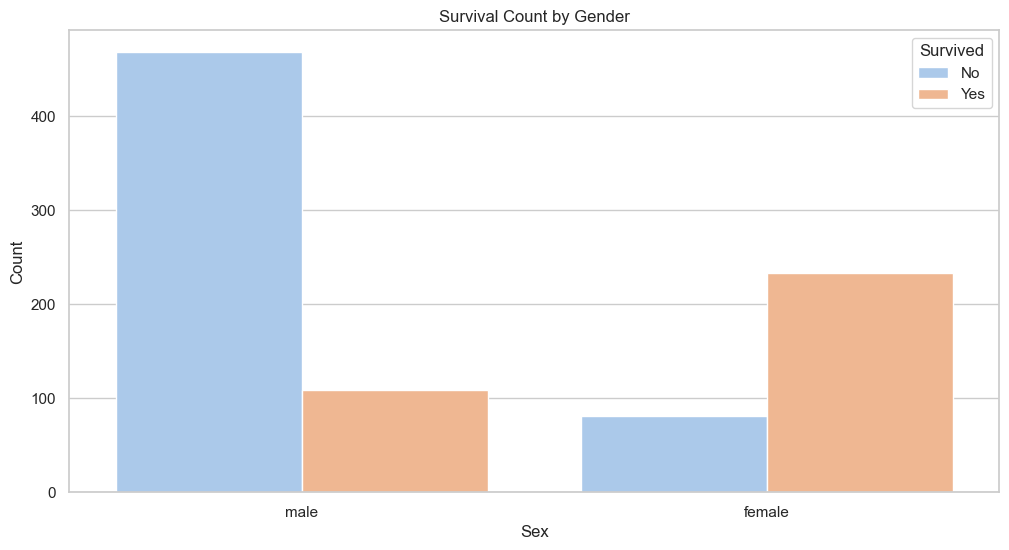

In [132]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Sex", hue="Survived", palette="pastel")
plt.title("Survival Count by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

In [106]:
plt.figure(figsize=(12, 6))
gender_survival = df.groupby("Sex")["Survived"].mean().reset_index()
px.bar(
    gender_survival,
    x="Sex",
    y="Survived",
    title="Survival Rate by Gender",
    color="Sex",
    text="Survived",
)

<Figure size 1200x600 with 0 Axes>

2. Survival Rate by Passenger Class

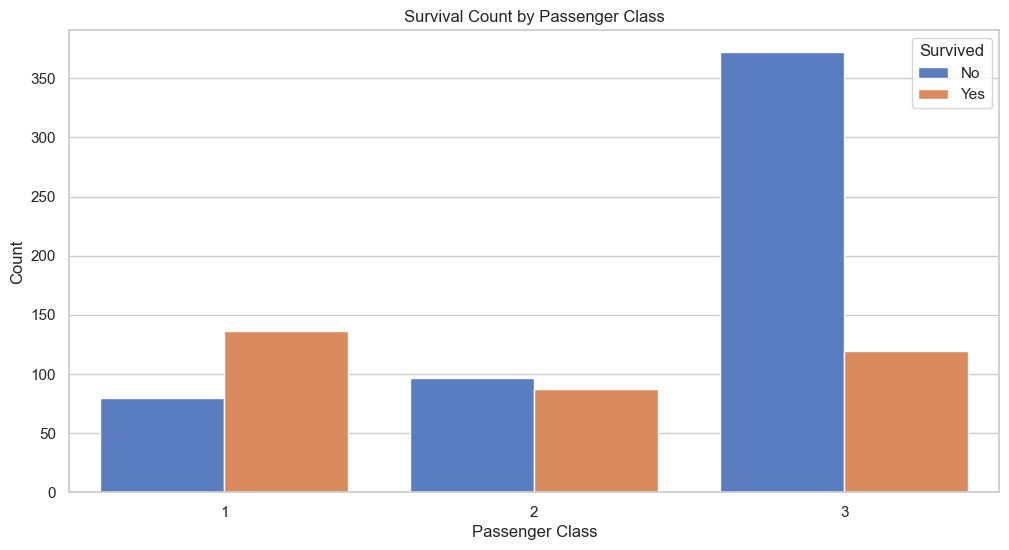

In [131]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Pclass", hue="Survived", palette="muted")
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
class_survival = df.groupby("Pclass")["Survived"].mean().reset_index()
px.bar(
    class_survival,
    x="Pclass",
    y="Survived",
    title="Survival Rate by Class",
    color="Pclass",
    text="Survived",
)

<Figure size 1200x600 with 0 Axes>

3. Survival Rate by Age Groups

In [111]:
df["AgeGroup"] = pd.cut(
    df["Age"],
    bins=[0, 12, 18, 35, 60, 100],
    labels=["Child", "Teen", "Young Adult", "Adult", "Senior"],
)

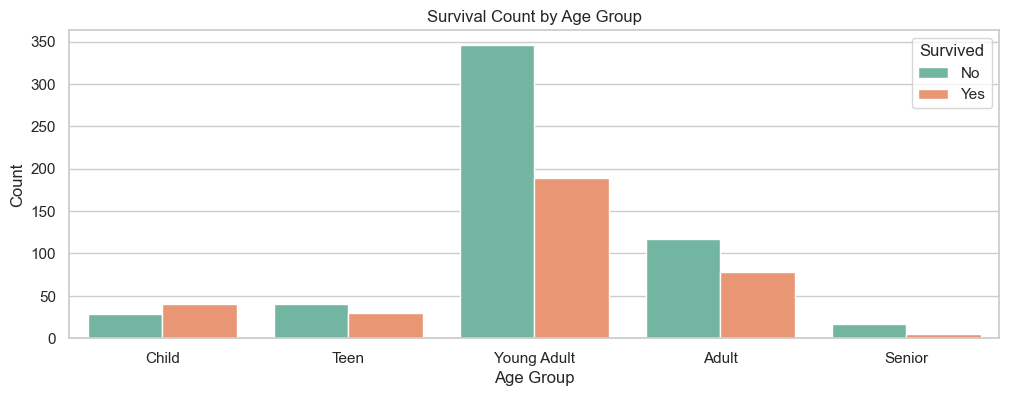

In [133]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x="AgeGroup", hue="Survived", palette="Set2")
plt.title("Survival Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

In [114]:
age_survival = df.groupby("AgeGroup")["Survived"].mean().reset_index()
px.bar(
    age_survival,
    x="AgeGroup",
    y="Survived",
    title="Survival Rate by Age Group",
    color="AgeGroup",
    text="Survived",
)

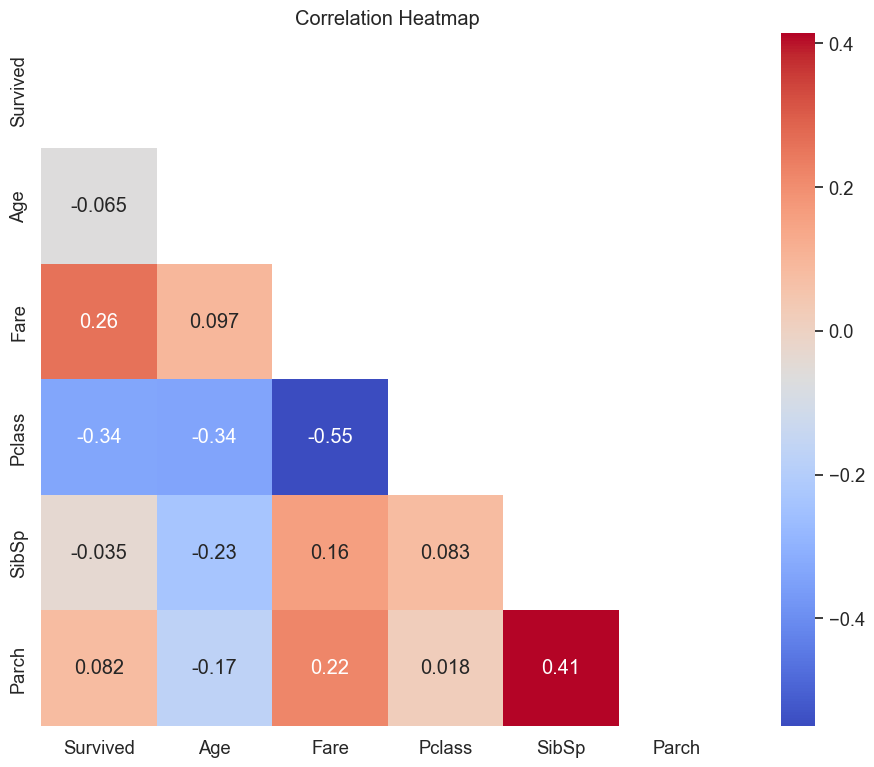

In [165]:
plt.figure(figsize=(12, 9))

corr_matrix = df[["Survived", "Age", "Fare", "Pclass", "SibSp", "Parch"]].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    mask=mask,
    square=True,
)
plt.title("Correlation Heatmap")
plt.show()

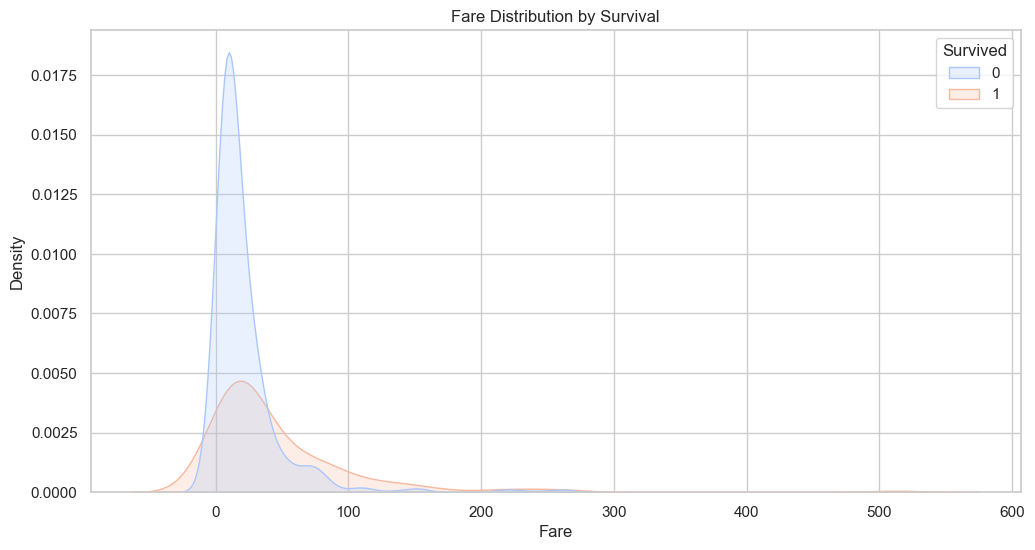

In [135]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x="Fare", hue="Survived", fill=True, palette="coolwarm")
plt.title("Fare Distribution by Survival")
plt.xlabel("Fare")
plt.show()

In [118]:
grouped = df.groupby(["Sex", "Pclass"])["Survived"].mean().reset_index()
print(grouped.pivot(index="Sex", columns="Pclass", values="Survived"))

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053       0.5
male    0.368852  0.157407  0.135447


### Part 4: Data Visualization

 1. Bar Chart: Survival by Gender

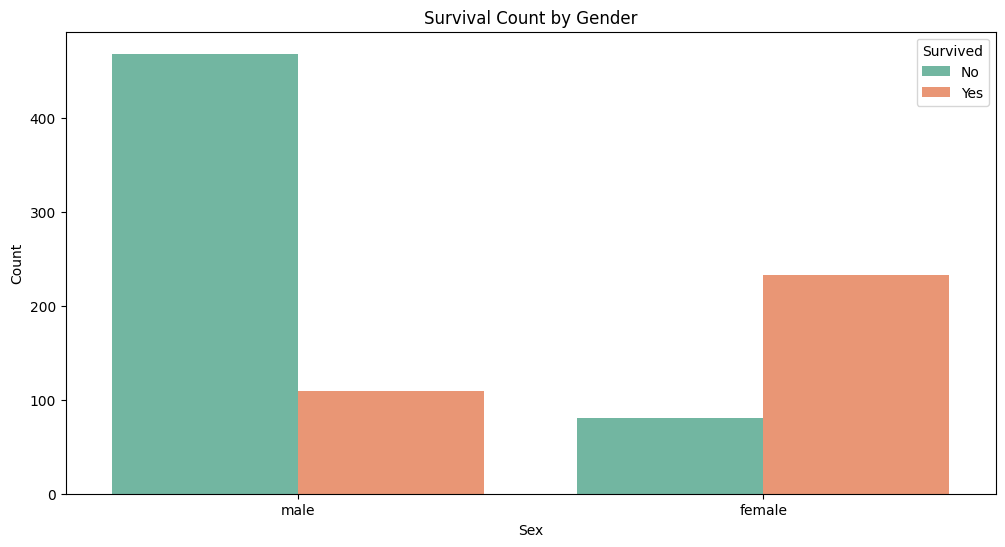

In [120]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Sex", hue="Survived", palette="Set2")
plt.title("Survival Count by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

In [129]:
sns.set_theme(style="whitegrid", palette="Set2")

2. Bar Chart: Survival by Passenger Class

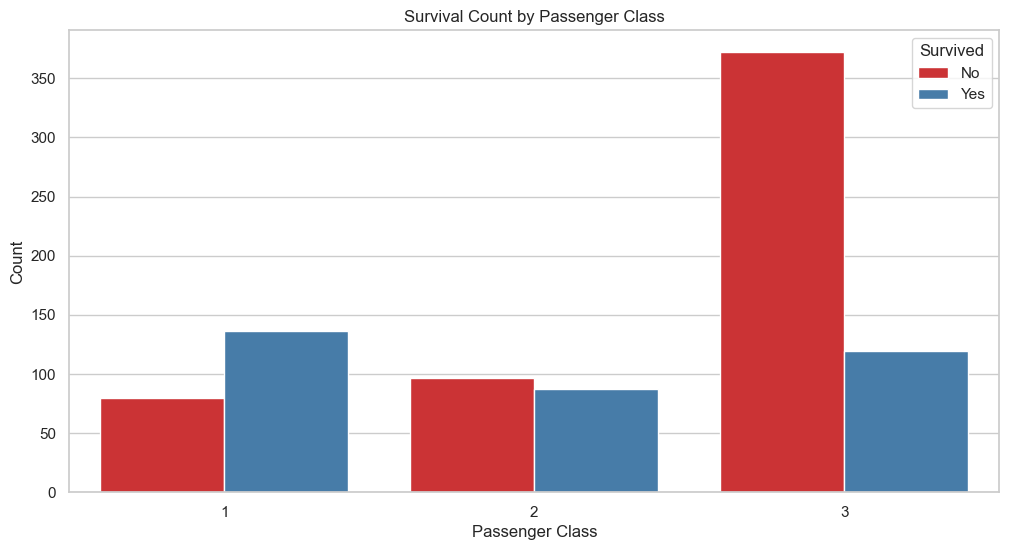

In [130]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Pclass", hue="Survived", palette="Set1")
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

3. Histogram: Age Distribution

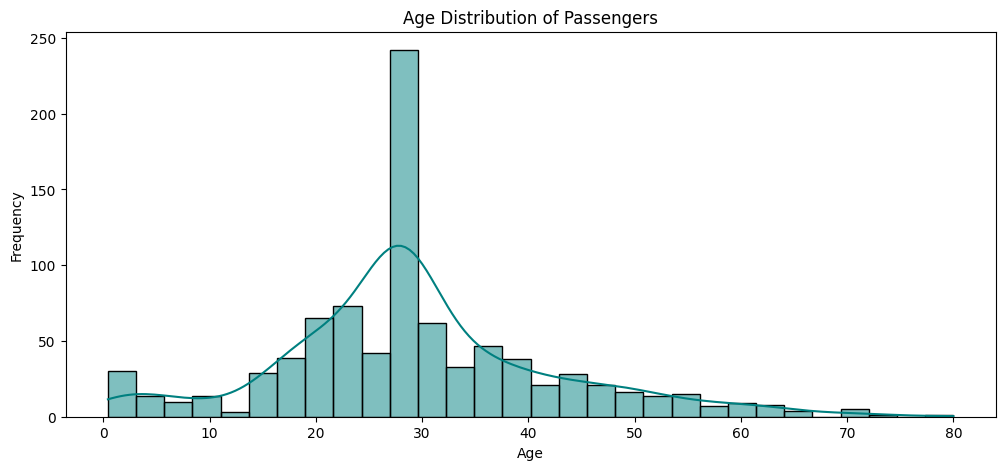

In [124]:
plt.figure(figsize=(12, 5))
sns.histplot(df["Age"], bins=30, kde=True, color="teal")
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

4. Boxplot: Fare by Class

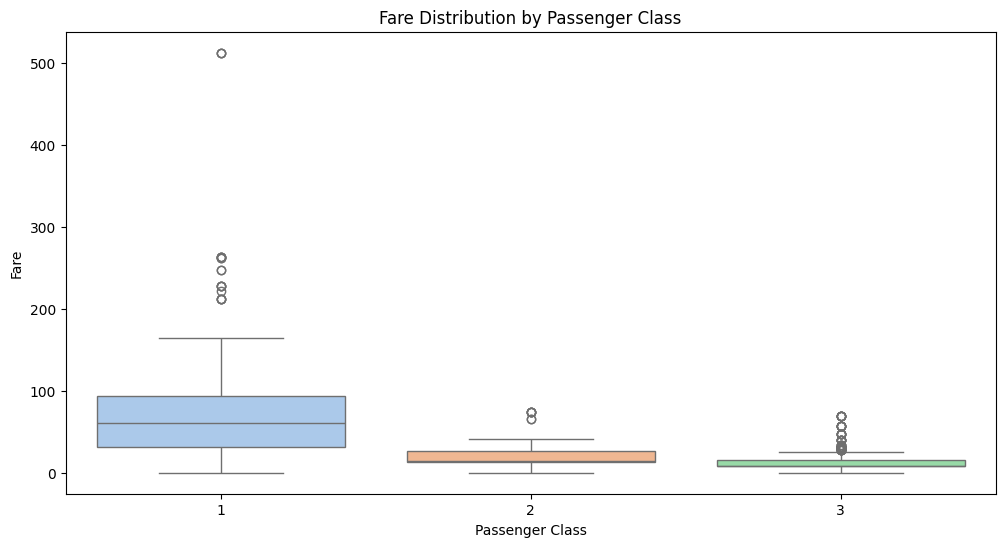

In [128]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Pclass", y="Fare", palette="pastel")
plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()